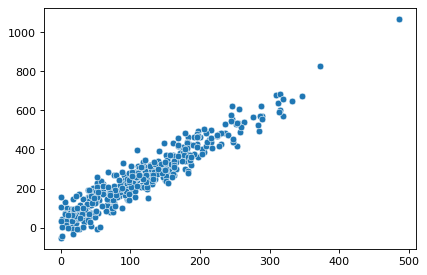

In [2]:
#0 Simulate phone dataset. 
#0a)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

data_x = np.abs(np.random.normal(loc=100, scale=100, size = 400))
data_error = np.random.normal(loc=0, scale=50, size=400)
data_y = 2*data_x + 25 + data_error

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = data_x, y = data_y)
plt.show()




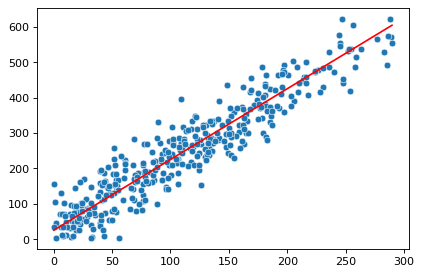

In [12]:
#0b)
cleaner = (0 < data_y) & (data_x < 300)
clean_x = data_x[cleaner]
clean_y = data_y[cleaner]
ground_truth = 2*clean_x + 25

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = clean_x, y = clean_y)
sns.lineplot(x = clean_x, y = ground_truth, color = 'red')

plt.show()

In [15]:
#0c)

import pandas as pd

new_x =pd.DataFrame(clean_x)
new_y = pd.DataFrame(clean_y)

In [99]:
#1a)

def train_test_split(x, y, train_fraction =.7, random_state=42, replace=False):
    return (x.sample(int(len(x)*train_fraction), random_state = random_state, replace=replace), y.sample(int(len(y)*train_fraction), random_state = random_state, replace=replace))

x_train,y_train = train_test_split(new_x,new_y)

x_test = new_x.drop(x_train.index)
y_test = new_y.drop(y_train.index)
#1b)
print(f"{len(y_test),len(y_train)}")
print(f"{len(x_test),len(x_train)}")



x_train.insert(0, "Intercept", 1)
x_test.insert(0, "Intercept", 1)



(115, 266)
(115, 266)


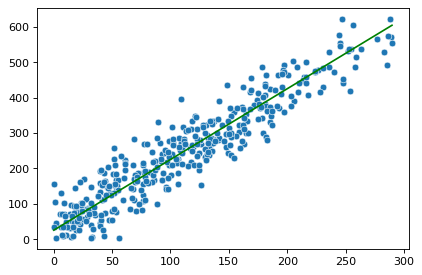

In [103]:
#2)



# this uses OLS normal equation
regression_fit = lambda X,y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(x_train, y_train)
predict = lambda X, weights: X @ weights
y_hat = predict(x_test.to_numpy(), beta_hat.to_numpy())
y_hat[:5,], y_test[:5]

fig, ax = plt.subplots(dpi=80)
sns.scatterplot(x = clean_x, y = clean_y)
sns.lineplot(x = clean_x, y = ground_truth, color = 'green')


plt.show()